# Author - Pranali Fating 

# The Sparks Foundation

# Task 3 : EDA- To Explore Business Analytics on Retailer Store Data 

Objective :
● Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

● As a business manager, try to find out the weak areas where you can work to make more profit.

● What all business problems you can derive by exploring the data?

In [1]:
# importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Taking Dataset from csv_file
df = pd.read_csv("SampleSuperstore.csv")

In [54]:
df.head()
        

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
print('Shape of data is:',df.shape)
print('Rows = ',df.shape[0])
print('Columns = ',df.shape[1])


Shape of data is: (9994, 13)
Rows =  9994
Columns =  13


In [5]:
# Checking missing values
# As there all values are zero means we don't have any null values with every feature columns
df.isnull().sum().to_frame('Null_values')

,Null_values
Ship Mode,0
Segment,0
Country,0
City,0
State,0
Postal Code,0
Region,0
Category,0
Sub-Category,0
Sales,0


In [6]:
#This describes the statistics information with integer contains columns values only
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
#Our dataset contains some float, int, string values datatypes.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
# checking for duplicates
df.duplicated().sum()

17

In [9]:
# Removing Duplicates
df = df.drop_duplicates()
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [10]:
# unique values count in each column
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [11]:
# Dropping irrelevants column that we have Postal Code and country
drop = df.drop(columns=['Postal Code','Country'], axis=1, inplace =True)

In [12]:
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [13]:
df.shape

(9977, 11)

In [14]:
# values in each column list
col_features = [features for features in df.columns]
for feature in col_features:
    print(feature,df[feature].unique())
    print("-"*75)


Ship Mode ['Second Class' 'Standard Class' 'First Class' 'Same Day']
---------------------------------------------------------------------------
Segment ['Consumer' 'Corporate' 'Home Office']
---------------------------------------------------------------------------
City ['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont'
 'Philadelphia' 'Orem' 'Houston' 'Richardson' 'Naperville' 'Melbourne'
 'Eagan' 'Westland' 'Dover' 'New Albany' 'New York City' 'Troy' 'Chicago'
 'Gilbert' 'Springfield' 'Jackson' 'Memphis' 'Decatur' 'Durham' 'Columbia'
 'Rochester' 'Minneapolis' 'Portland' 'Saint Paul' 'Aurora' 'Charlotte'
 'Orland Park' 'Urbandale' 'Columbus' 'Bristol' 'Wilmington' 'Bloomington'
 'Phoenix' 'Roseville' 'Independence' 'Pasadena' 'Newark' 'Franklin'
 'Scottsdale' 'San Jose' 'Edmond' 'Carlsbad' 'San Antonio' 'Monroe'
 'Fairfield' 'Grand Prairie' 'Redlands' 'Hamilton' 'Westfield' 'Akron'
 'Denver' 'Dallas' 'Whi

In [15]:
df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


# Data Visualization

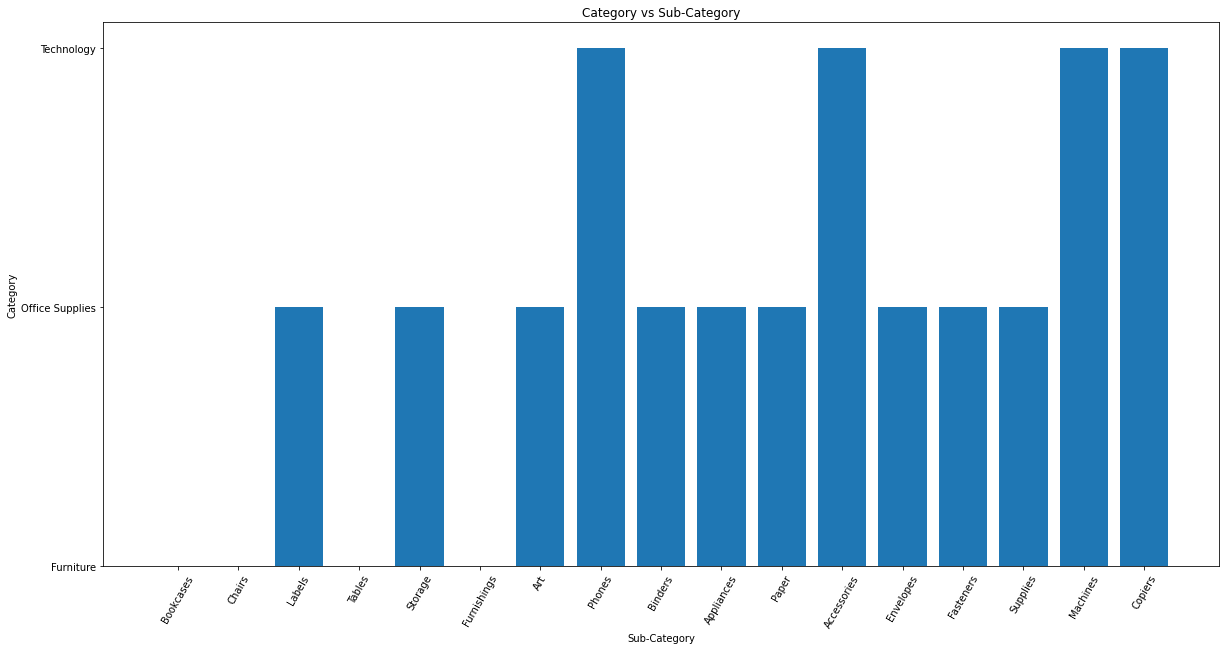

In [15]:
# Let's check the category with subcategory visualization
plt.figure(figsize=(20,10))
plt.bar('Sub-Category','Category',data=df)
plt.title('Category vs Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Category')
plt.xticks(rotation=60)
plt.show()

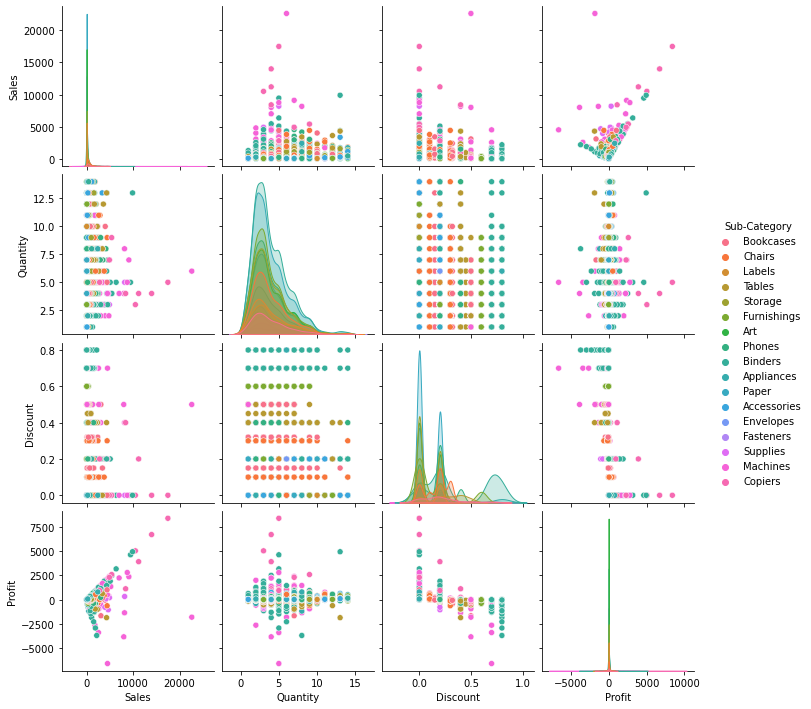

In [19]:
figsize=(15,20)
sns.pairplot(df,hue='Sub-Category')

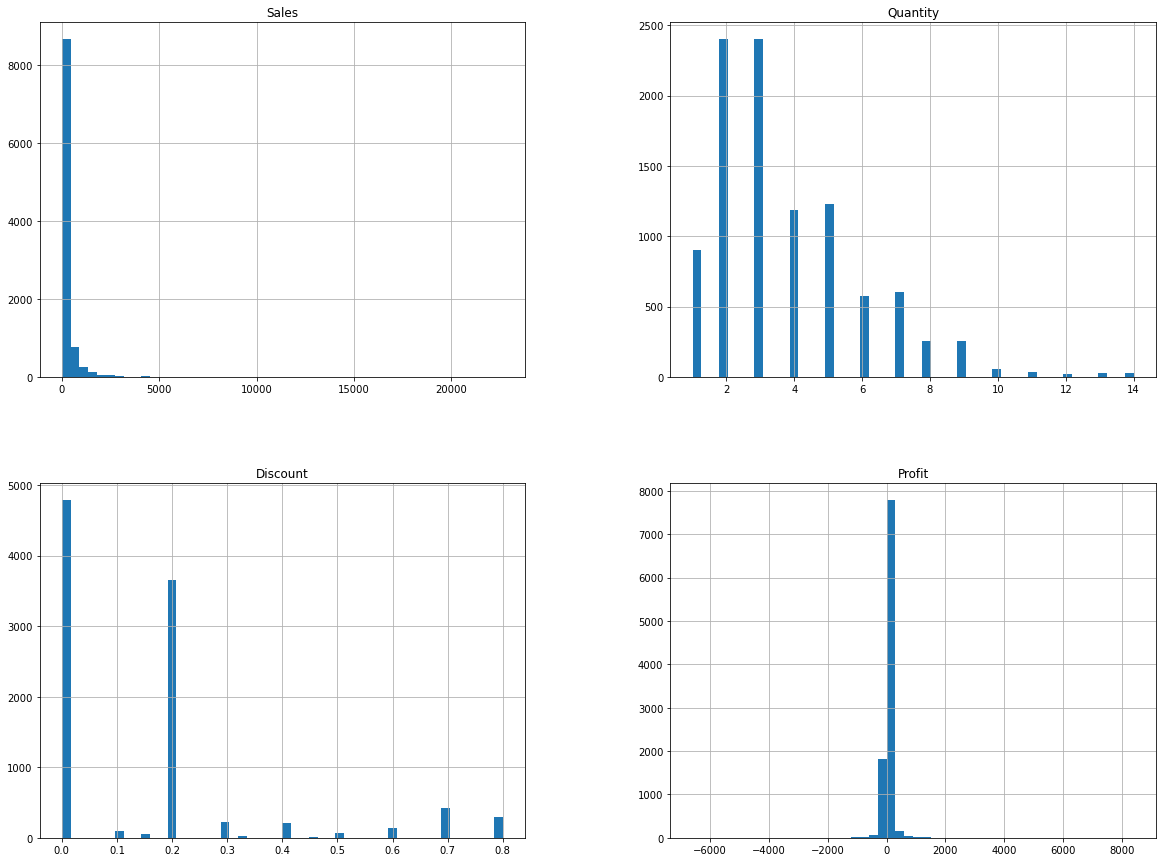

In [18]:
df.hist(bins=50,figsize=(20,15))
plt.show()

In [17]:
# count the total repeated States
df['State'].value_counts()

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

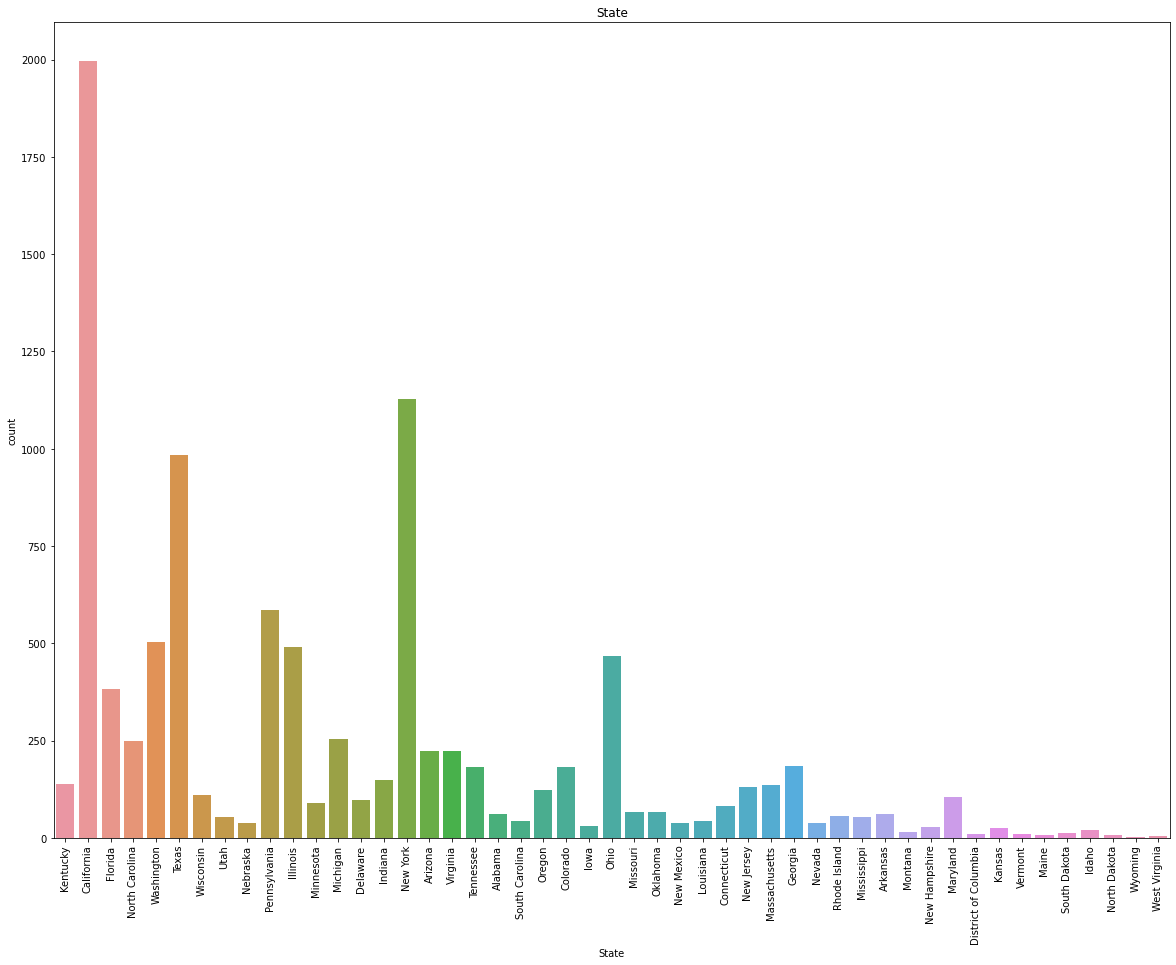

In [25]:
# Sales wise states visualization
plt.figure(figsize=(20,15))
sns.countplot(x=df['State'])
plt.xticks(rotation=90)
plt.title('State')
plt.show()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64


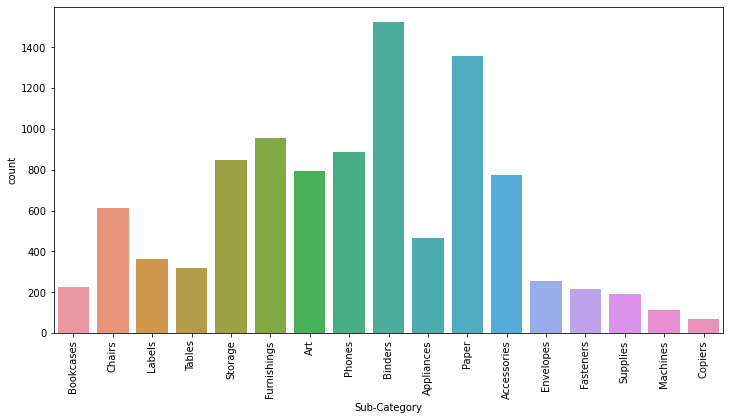

In [26]:
print(df['Sub-Category'].value_counts())
plt.figure(figsize = (12,6))
sns.countplot(x=df['Sub-Category'])
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Segment', ylabel='count'>

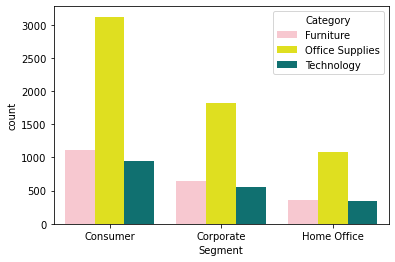

In [27]:
# Looking on Category with segment
sns.countplot(x='Segment' ,hue = 'Category', data =df,palette=['pink','yellow','teal'])

<AxesSubplot:xlabel='Region', ylabel='count'>

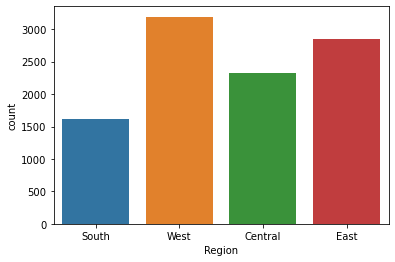

In [28]:
sns.countplot(x=df['Region'])

In [24]:
# West Region has more counts of sale

In [30]:
df.groupby('State').Profit.agg(['sum','mean','min','max','count','median','std','var'])

,sum,mean,min,max,count,median,std,var
State,,,,,,,,
Alabama,5786.8253,94.865989,0.0000,1459.2000,61,16.87500,210.901876,44479.601429
Arizona,-3427.9246,-15.303235,-814.4832,211.4955,224,2.53365,109.266267,11939.117124
Arkansas,4008.6871,66.811452,1.4190,843.1706,60,18.34080,123.249880,15190.532873
California,76330.7891,38.241878,-325.5720,1906.4850,1996,13.33380,97.803399,9565.504848
Colorado,-6527.8579,-35.867351,-3399.9800,247.9960,182,3.12480,276.424024,76410.240842
Connecticut,3511.4918,42.823071,-15.5826,294.6710,82,12.18310,66.138081,4374.245726
Delaware,9977.3748,103.930988,-48.7839,5039.9856,96,19.19700,518.953513,269312.749126
District of Columbia,1059.5893,105.958930,4.4344,648.5624,10,14.52720,213.461353,45565.749398
Florida,-3399.3017,-8.875461,-1811.0784,327.5922,383,2.93400,126.324165,15957.794770


In [31]:
df.groupby('State').sum().sort_values('Profit').tail()


,Sales,Quantity,Discount,Profit
State,,,,
Virginia,70636.7200,893,0.0,18597.9504
Michigan,75879.6440,943,1.8,24428.0903
Washington,138560.8100,1871,32.4,33368.2375
New York,310827.1510,4220,62.4,74015.4622
California,457576.2715,7649,145.6,76330.7891


In [27]:
# The top 5 States generating most profits are California , New York , Washington , Michigan , Virginia

In [32]:
# let's visualize the data from highest city Profit
newdf = df[df['State'].isin(['California','New York','Washington','Michigan','Virginia'])]

<AxesSubplot:xlabel='State', ylabel='count'>

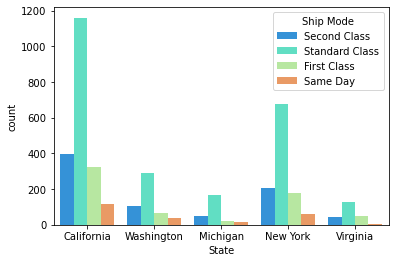

In [33]:
# Top 5 states with Ship Mode
sns.countplot(x='State',hue='Ship Mode', data = newdf, palette ='rainbow')

In [30]:
# the preferred shiping mode of the Top 5 States generating most profit was Standard Class

<AxesSubplot:xlabel='Segment', ylabel='count'>

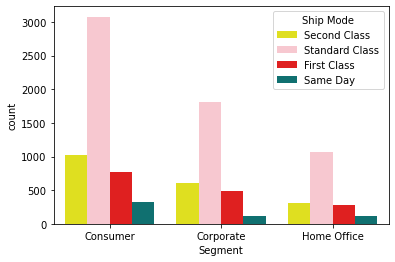

In [31]:
sns.countplot(x='Segment' ,hue = 'Ship Mode', data =df,palette=['yellow','pink','red','teal'])

In [32]:
# For consumer, Corporate, Home Office preferred shiping mode is Standard Class

<AxesSubplot:xlabel='Ship Mode', ylabel='Profit'>

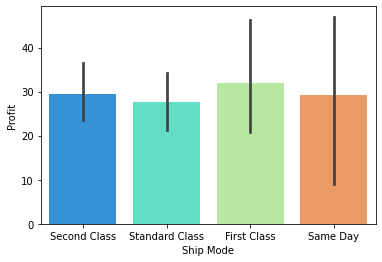

In [33]:
# profit vs shipmode
sns.barplot(x=df['Ship Mode'], y=df['Profit'],palette='rainbow')

In [34]:
# the standard class had most orders, as well First class generated most profit

# Now exploring weak areas Sales Profit

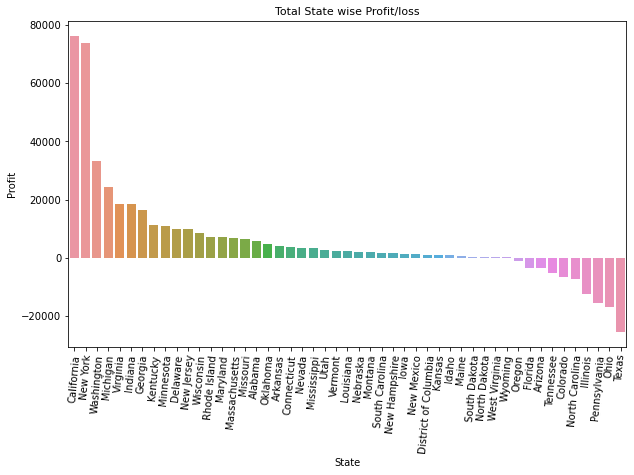

In [34]:
# Sales profit with State
states =np.round(df.groupby('State').sum(), decimals=2).sort_values('Profit',ascending=False)
plt.figure(figsize=(10,6))
plt.title('Total State wise Profit/loss', fontsize=11)
sns.barplot(states.index,states.Profit)
plt.xticks(rotation=85)
plt.show()

In [36]:
# Analysis on Sales loss
loss_sales = np.round(df[-(df.Profit) > 0], decimals=2).sort_values('Profit')

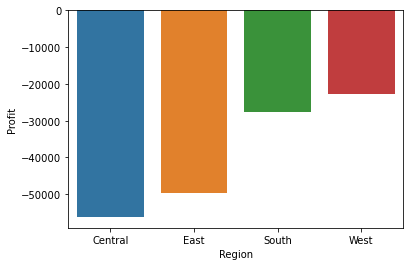

In [37]:
#Sales loss in Region
region_loss = loss_sales.groupby('Region').sum()
sns.barplot(region_loss.index,region_loss.Profit)
plt.show()

In [38]:
print("States with loss Region","\n","-"*105)
print(f"Central:",loss_sales[loss_sales.Region == "Central"].State.unique().tolist())
print(f"East:",loss_sales[loss_sales.Region == "East"].State.unique().tolist())
print(f"South:",loss_sales[loss_sales.Region == "South"].State.unique().tolist())
print(f"West:",loss_sales[loss_sales.Region == "West"].State.unique().tolist())

States with loss Region 
 ---------------------------------------------------------------------------------------------------------
Central: ['Texas', 'Illinois']
East: ['Ohio', 'Pennsylvania', 'New York', 'Massachusetts', 'Rhode Island', 'New Hampshire', 'West Virginia', 'Delaware', 'Maryland', 'New Jersey', 'Connecticut']
South: ['North Carolina', 'Florida', 'Tennessee']
West: ['Colorado', 'Arizona', 'Oregon', 'California', 'Nevada', 'Washington', 'New Mexico']


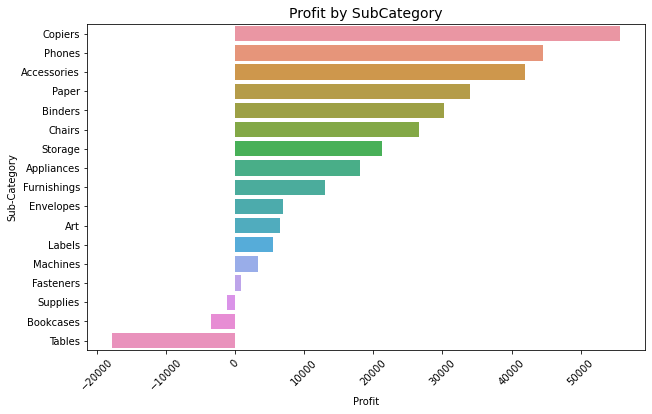

In [40]:
# Sales summary by Sub-category
summary =np.round(df.groupby('Sub-Category').sum(), decimals=2).sort_values('Profit',ascending=False)
plt.figure(figsize=(10,6))
plt.title('Profit by SubCategory', fontsize=14)
sns.barplot(summary.Profit,summary.index)
plt.xticks(rotation=45)
plt.show()

Total items Sold: 37820


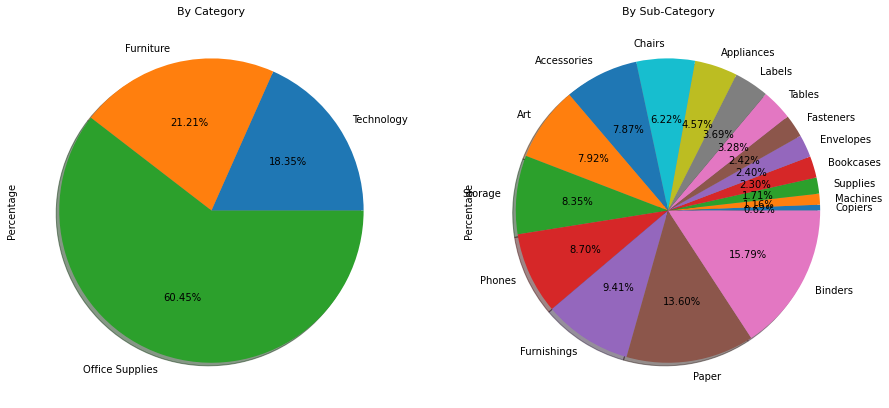

In [43]:
vis_1 = df.groupby('Category').sum().iloc[:,1].sort_values().to_frame('Count')
vis_2 = df.groupby('Sub-Category').sum().iloc[:,1].sort_values().to_frame('Count')
print(f'Total items Sold: {df.Quantity.sum()}')
fig, ax = plt.subplots(1,2, figsize=(15,10))
ax[0].set_title('By Category', fontsize=11)
ax[1].set_title('By Sub-Category', fontsize=11)
vis_1.Count.plot.pie(autopct='%1.2f%%', label='Percentage', radius=1, shadow=True, ax=ax[0])
vis_2.Count.plot.pie(autopct='%1.2f%%', label='Percentage', radius=1, shadow=True, ax=ax[1])
plt.show()

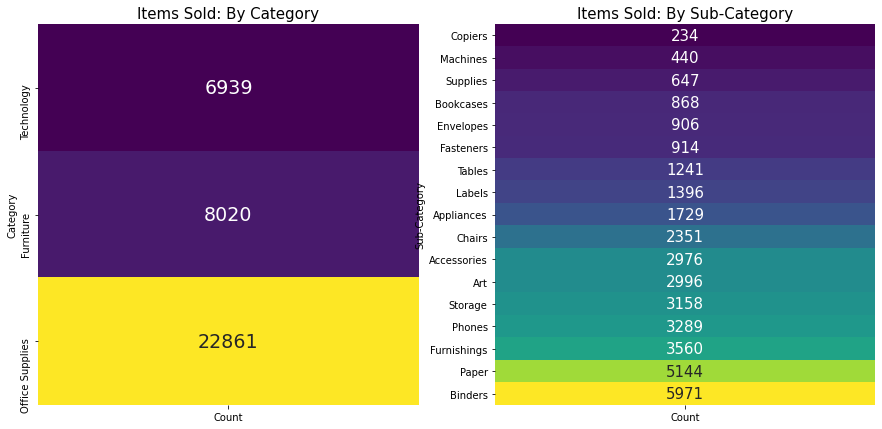

In [44]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].set_title('Items Sold: By Category', fontsize=15)
ax[1].set_title('Items Sold: By Sub-Category', fontsize=15)
sns.heatmap(vis_1, ax=ax[0], annot=True, cbar=False,cmap='viridis',yticklabels=True, fmt='2', annot_kws={'size':19})
sns.heatmap(vis_2, ax=ax[1],annot=True,cbar=False, cmap='viridis', yticklabels=True,fmt='2', annot_kws={'size':15})
plt.show()

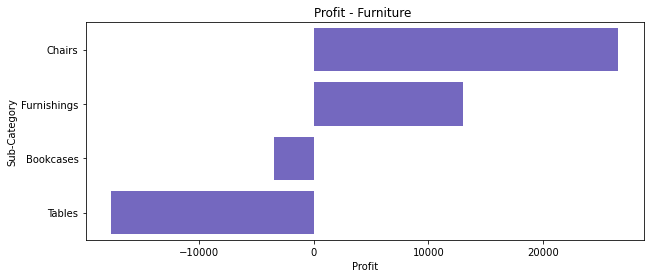

In [45]:
# Furniture-category  visualization
furn_cat = df[df.Category == 'Furniture'].groupby('Sub-Category').sum().sort_values('Profit', ascending=False).iloc[:, [-1]]
plt.figure(figsize=(10,4))
plt.title('Profit - Furniture ')
sns.barplot( furn_cat.Profit, furn_cat.index,color='slateblue')
plt.show()

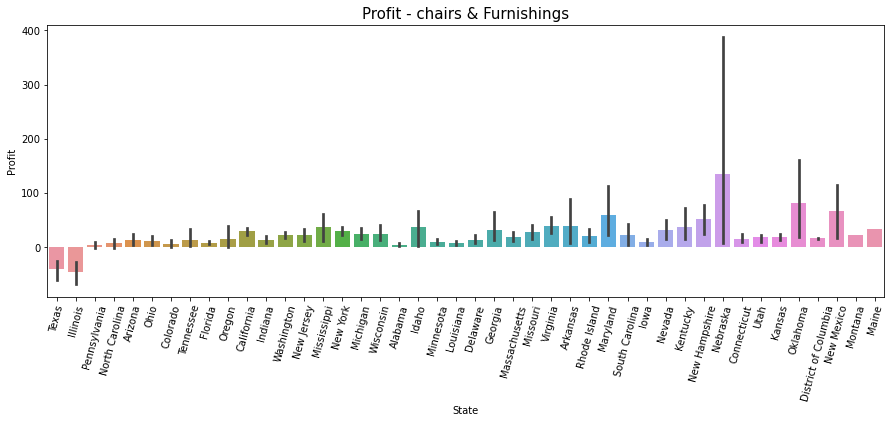

In [43]:
# chairs and Furnishings
furn_state= df[(df['Sub-Category']=='chairs') | (df['Sub-Category']== "Furnishings")].sort_values('Profit')
plt.figure(figsize=(15,5))
plt.title('Profit - chairs & Furnishings',fontsize=15)
sns.barplot(furn_state['State'],furn_state.Profit)
plt.xticks(rotation=75)
plt.show()

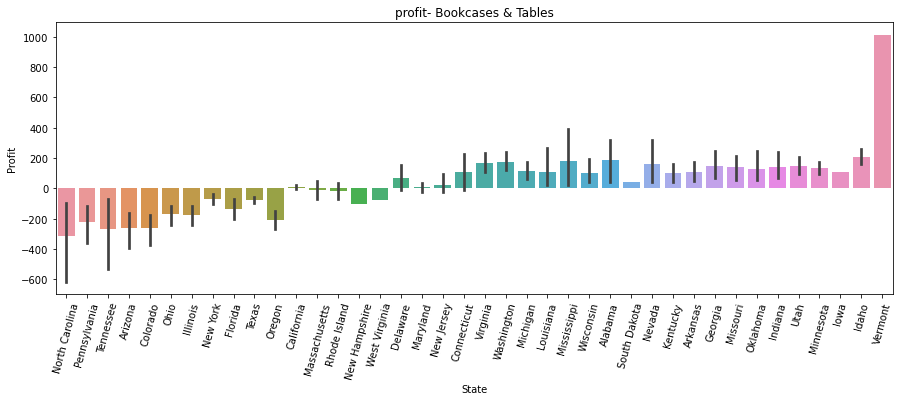

In [44]:
# Bookcases and Tables
Bc_Tb = df[(df['Sub-Category']=='Bookcases') | (df['Sub-Category']=='Tables')].sort_values('Profit')
plt.figure(figsize=(15,5))
plt.title('profit- Bookcases & Tables')
sns.barplot(Bc_Tb['State'],Bc_Tb.Profit)
plt.xticks(rotation=75)
plt.show()


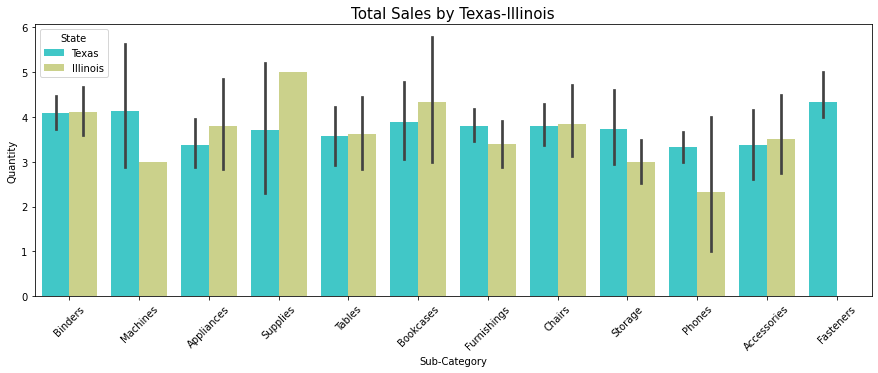

In [46]:
# Texas-Illinois Sales Analysis
# Plotting Central Region Sales Loss
central = loss_sales[loss_sales.Region=='Central']
plt.figure(figsize=(15,5))
plt.title("Total Sales by Texas-Illinois",fontsize=15)
sns.barplot(central['Sub-Category'],central['Quantity'],hue=central['State'],palette='rainbow')
plt.xticks(rotation=45)
plt.show()




In [47]:
Weak_States = df[(df.State == 'Texas') | (df.State == 'Illinois')].iloc[:, [2,3,5,6,-2,-1]].sort_values('State')

TEXAS & ILLINOIS - Sales Analysis by Category


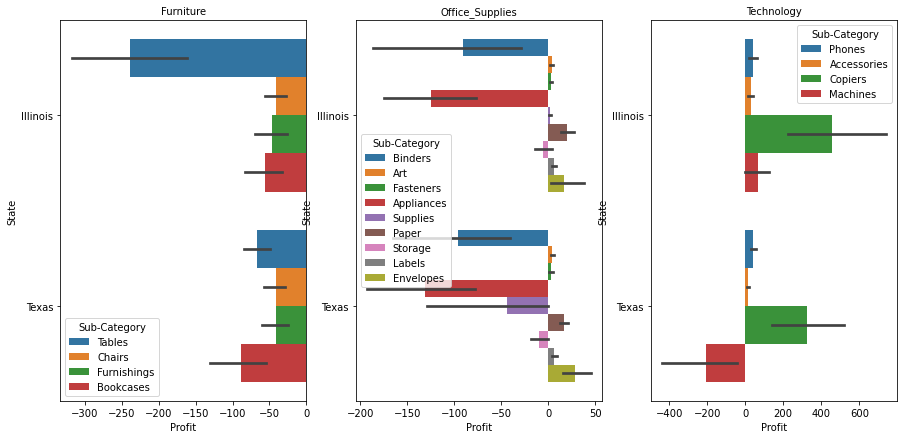

In [48]:
Weak_States_f = Weak_States[Weak_States.Category == 'Furniture']
Weak_States_o = Weak_States[Weak_States.Category == 'Office Supplies']
Weak_States_t = Weak_States[Weak_States.Category == 'Technology']
print('TEXAS & ILLINOIS - Sales Analysis by Category')
fig, ax = plt.subplots(1,3, figsize=(15,7))
ax[0].set_title('Furniture', fontsize=10)
ax[1].set_title('Office_Supplies', fontsize=10)
ax[2].set_title('Technology', fontsize=10)
sns.barplot(Weak_States_f.Profit, Weak_States_f.State, hue=Weak_States_f['Sub-Category'], ax=ax[0])
sns.barplot(Weak_States_o.Profit, Weak_States_o.State, hue=Weak_States_o['Sub-Category'], ax=ax[1])
sns.barplot(Weak_States_t.Profit, Weak_States_t.State, hue=Weak_States_t['Sub-Category'], ax=ax[2])
plt.show()

In [49]:
texas_profit = Weak_States.Profit.sum()
texas_loss = Weak_States.Profit[-Weak_States.Profit > 0].sum()

In [50]:
print(f"Sales Profit of Texas & Illinois: ",np.round(texas_profit,decimals=2))
print(f"Profit if avoided items that cause loss: ",np.round(texas_profit-texas_loss,decimals=2))

Sales Profit of Texas & Illinois:  -38352.63
Profit if avoided items that cause loss:  17956.01


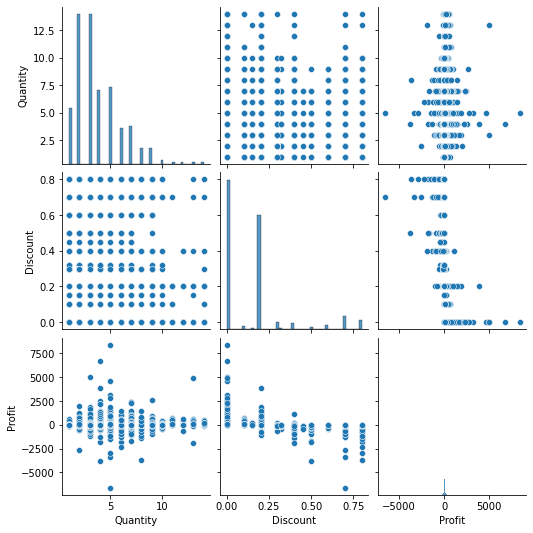

In [52]:
# Pairplot showing dependency of variables 
sns.pairplot(data=df.iloc[:,-3:], kind='scatter')
plt.show()

<AxesSubplot:xlabel='Discount', ylabel='Density'>

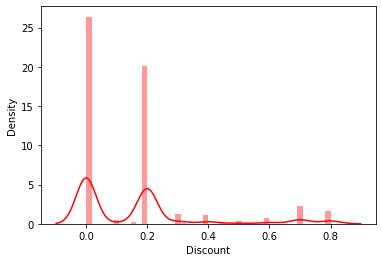

In [53]:
sns.distplot(df['Discount'], color='red')
# most of the orders had no discount , followed by 0.2% discount

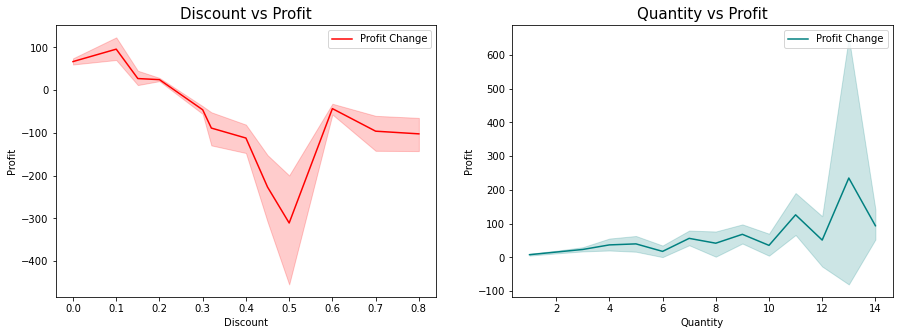

In [79]:
# Analysis on Discount, Quantity & Profit
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].set_title('Discount vs Profit', fontsize=15)
ax[1].set_title('Quantity vs Profit', fontsize=15)
sns.lineplot(df.Discount, df.Profit, color='red', label='Profit Change', ax=ax[0])
sns.lineplot(df.Quantity, df.Profit, color='teal', label='Profit Change', ax=ax[1])
plt.show()

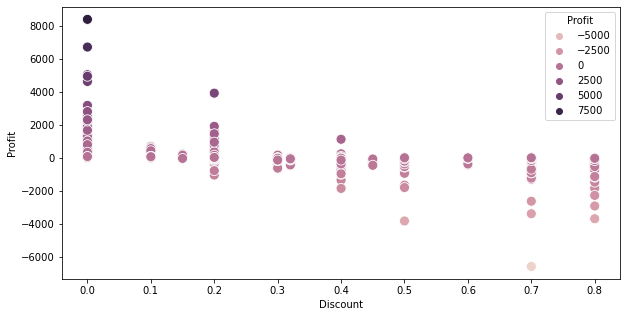

In [83]:
# Plotting Profit Change with Discount
plt.figure(figsize=(10,5))
sns.scatterplot(df.Discount , df.Profit, hue = df.Profit, s=100)
plt.show()

# Conclusion

# Thank You